In [2]:
pip install yfinance


     -------------------------------------- 108.5/108.5 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 948.2/948.2 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139064 sha256=ba11f424b1eaeb10147ed87a065e56a81d6b9ab8d0cbeb8dbd353ef713feb077
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\06\b3\7f\ed42a7c83ad89f578928833f5789212c694a015b8bd6a407a1
Successfully bu

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [3]:
import yfinance as yf
import pandas as pd


In [4]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)


In [5]:
print(tesla_data.head())
tesla_data.to_csv("Tesla_Stock_Data.csv", index=False)


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [6]:
from bs4 import BeautifulSoup
import requests


In [7]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tr"):
    col = row.find_all("td")
    if len(col) == 2:
        date = col[0].text.strip()
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.to_csv("Tesla_Revenue_Data.csv", index=False)
print(tesla_revenue.head())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [8]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)


In [9]:
print(gamestop_data.head())
gamestop_data.to_csv("GameStop_Stock_Data.csv", index=False)


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [10]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tr"):
    col = row.find_all("td")
    if len(col) == 2:
        date = col[0].text.strip()
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        gamestop_revenue = gamestop_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

gamestop_revenue = gamestop_revenue[gamestop_revenue["Revenue"] != ""]
gamestop_revenue.to_csv("GameStop_Revenue_Data.csv", index=False)
print(gamestop_revenue.head())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


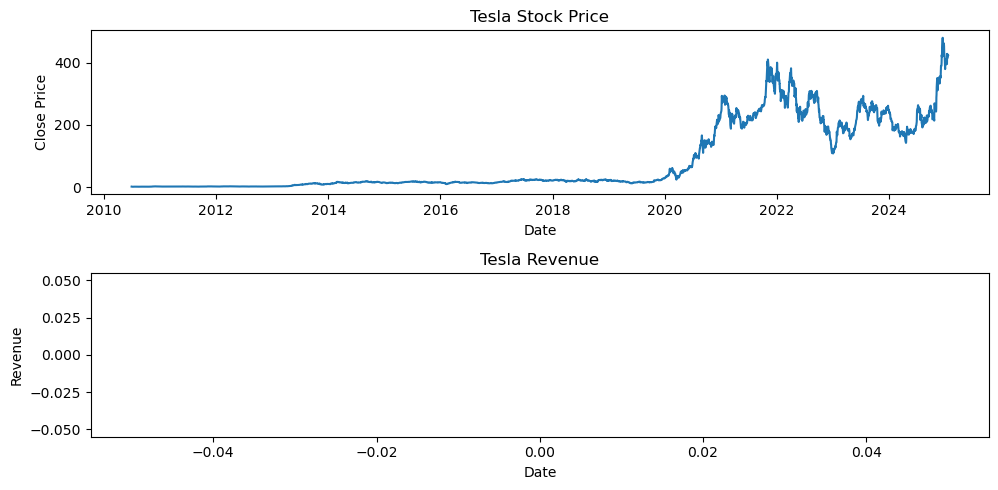

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla Stock Price')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(2, 1, 2)
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], label='Tesla Revenue', color='orange')
plt.title('Tesla Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()


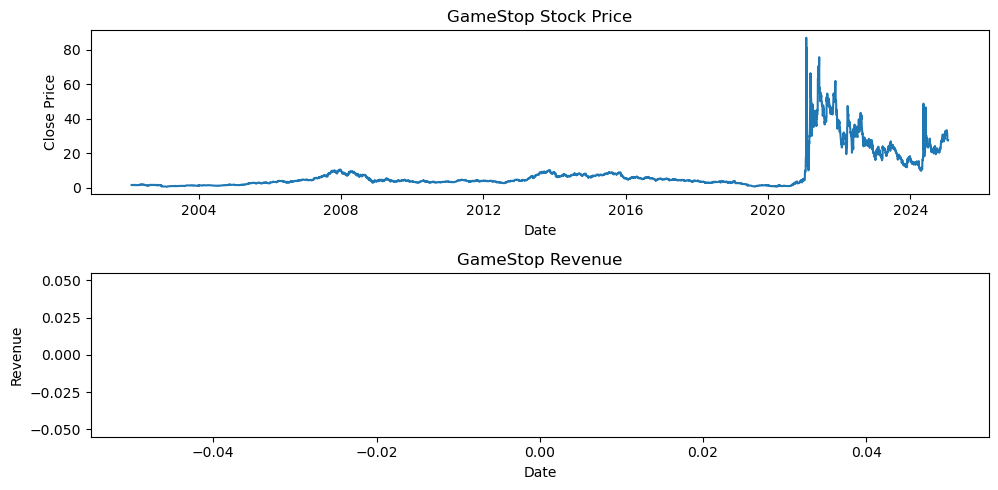

In [12]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(gamestop_data['Date'], gamestop_data['Close'], label='GameStop Stock Price')
plt.title('GameStop Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.subplot(2, 1, 2)
plt.plot(gamestop_revenue['Date'], gamestop_revenue['Revenue'], label='GameStop Revenue', color='green')
plt.title('GameStop Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()
